# Project 1 Report -  Dean Knudson

## Overview

For my third year project I have continued working with David Rozado on a Sentiment Analysis Engine.

Last semester, as part of a special topic study, I began learning about, and creating models for, Sentiment Analysis. The intentions of this project were to create a model that would correctly predict the sentiment of a given piece of text 80% of time. David offered for me to continue working on the problem this semester. Due to to the fact I didn't achieve the result above and the availability of recent advancements in the field of NLP, I accepted.

More details on my work last semester can be found 
[here](https://github.com/knuddj1/Sentiment-Analysis/blob/master/recap%20stuff/semester_recap.ipynb)

The official objective of this project is to create a Sentiment Analysis Engine that is able to correctly classify the sentiment of a piece of text into 1 of 3 possible classes (negative, neutral, positive) at a greater, equal or close to equal to accuracy of 80% that david set for me last semester. 

This notebook covers the processes I underwent as part of this project. Each section is listed below:

1. [Dataset](#Dataset)
    - [Data Collection](#Data-Collection)
    - [Constructing a Custom Dataset](#Constructing-a-Custom-Dataset)
    - [GUI Application](#GUI-Application)

2. [Modeling](#Modeling)
    - [Establishing Baselines](#Establishing-Baselines)
    - [BERT](#BERT)
    - [bert-as-service](#bert-as-service)
    - [Cosine-Similarity](#Cosine-Similarity)
    - [Grid Search](#Grid-Search)

3. [Development](#Development)
    - [Technical/Professional Proficiency](#Technical/Professional-Proficiency)
    - [Voluntary](#Voluntary)

---
# Dataset

### Data Collection

The intial task of a machine learning project is to obtain a dataset, or in this case I used **mutliple** datasets and created a new dataset out of these combined.

David advised me to read [this](https://monkeylearn.com/sentiment-analysis/) website as a refresher to refamiliarize myself with the world of sentiment analysis. This website also offered download links to their favourite datasets for experimenting with sentiment analysis and a machine learning approach.

#### Datasets found at monkeylearn.com:
    
[Amazon Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews/)
>*"This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all 500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories."*

[Amazon Reviews for Sentiment Analysis](https://www.kaggle.com/bittlingmayer/amazonreviews/)
>*"This dataset consists of a few million Amazon customer reviews (input text) and star ratings (output labels) for learning how to train fastText for sentiment analysis.
The idea here is a dataset is more than a toy - real business data on a reasonable scale - but can be trained in minutes on a modest laptop."*

[Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment/)
>*"A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets"*

#### Datasets found elsewhere:

[sentiment140](http://help.sentiment140.com/)
>*"It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment. Sentiment140 was created by Alec Go, Richa Bhayani, and Lei Huang, who were Computer Science graduate students at Stanford University."*

[Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/)
>*"Obtained from IMDB movie reviews, this is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details."*

#### Considered but not used

Both of these were found on monkeylearn.com.

[First GOP Debate Twitter Sentiment](https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment/)
>*"We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset"*

I chose not to use this dataset because lots of the samples in this dataset were not correctly labeled. It was unreliable.

[Yelp Dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset)
>*"This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the dataset you'll find information about businesses across 11 metropolitan areas in four countries."*

I didnt use this dataset because I couldnt get it to load properly. There was something wrong with the file that prevented me from actually parsing the data.

---
### Constructing a Custom Dataset

The next task, after sourcing the datasets, was to combine them all into a single dataset. I originally planned for this part of the project to take only about a week. However, it ended up taking about four weeks as I ended up building a GUI application that I will be able to use in the future with other projects involving multiple datasets.

### Configuration File


I created a configuration file to hold all the parameters for the creation of a dataset, as well as the configs for loading each individual dataset. Below is the format of an example configuration file.

    {
        "DATASET_NAME": "Example Dataset Name",
        "DATASET_FILE_EXTENSION": "csv",
        "TEST_SET_SIZE": 0.2,
        "SHUFFLE": true,
        "NUM_SHUFFLES": 10,
        "CONCAT_TYPE": "equal",
        "CONFIGS": {
            "Example Dataset 1": {
                "DATASET_PATH": "dataset/path/example1.zip",
                "LOADING_SCRIPT": "loading/script/path/example1.py",
                "PERCENT": 0.6,
                "OTHER_PARAMS": null
            },
            "Example Dataset 2": {
                "DATASET_PATH": "dataset/path/example2.zip",
                "LOADING_SCRIPT": "loading/script/path/example2.py",
                "PERCENT": 0.9,
                "OTHER_PARAMS": {
                    "example_param1": 100,
                    "example_param2": "example text"
                }
            }
        }
    }

### Loading Scripts

Each dataset came in its own format, inside its own specific filetype. Some datasets had redundant data. To solve this issue I created a loading script for each dataset. The loading scripts consisted of a single function called *load* which contains instructions to extract a specific dataset and the returns that dataset as list of dictionaries in the format:

    [
        {
            input: example text 1
            label: example classification label 1
        },
        
        ...
        
        {
            input: example text N
            label: example classification label N
        }
    ]

### Train-Test Split

After each dataset is loaded and in the same format displayed above, they are then concatenated into a single dataset. I created two different variations of concatenating the datasets listed below:

 - **Equal Concatenation**
 
    First the the number of samples in the dataset with the least samples is found. Then that number of samples is retrieved from each of the other datasets. Each of these new subsets are then split by a parameter _test-split_, a decimal number between 0 - 0.5. The percentage of the subset split by this parameter is saved into a csv-file with name "DATASET_test.csv". The remainder of the subset is placed into the training set.

- **Percentage Concatenation**

    This is the same as equal concatenation above except that instead of using the number of samples in the smallest dataset, the percentage parameter from each datasets config is used instead. Therefore if example dataset A's config has a percentage of 0.7, 70% of that dataset will be used.

Each dataset will be shuffled _n_ times before subsets are extracted, if the shuffle parameter in the configuration file is set to true.

---
### GUI Application

In an effort to organise my thoughts and to make creating various custom datasets an easier, I went on somewhat of a tangent and created a GUI interface for this process. I used a python package Tkinter, which is part of the standard library to create the GUI. The section that follows is a brief walk through of the process of creating a custom dataset:

1. The intial view prompts the user to either create a new configuration file or load an existing one. Loading an existing configuration file follows the same process as seen below however all settings and data-configs are loaded. I added this feature to allow me to quickly change settings and add/change/delete datasets to the custom dataset without having to re-enter all the information each time, as that was rather time consuming.

![](images/view1.jpg)

2. After pressing the New or Load buttons the user is presented with this view. This is where the settings that affect how the custom dataset shapes up. The behaviours of each field are:
 
 - Dataset name: What the final custom dataset will be named
 - Dataset File Extension: Either csv or json, this is the file type that the custom dataset will be saved under
 - Test set size: This is how much of the custom dataset will be used for testing
 - Shuffle Dataset: Whether to shuffle each individual dataset before they are split and concatenated
 - Number shuffles: How many times to shuffle each individual dataset
 - Dataset Concatenation Type: The method to split and concatenate individual datasets


![](images/view2.jpg)

3. This view is presented when the user chooses to proceed from the settings view. Note that the user can choose to go back and edit the settings again at any time by pressing the settings button in the top left. The user then must create at least one new dataset config, by pressing the big add new data config button, to proceed any further.

![](images/view3.jpg)

4. Pressing the add new data config button on the previous slide presents the user with this view. This is where individual dataset information is added. The name of the dataset, a path to the dataset and a path to the loading script for that dataset must be supplied. The other parameters are optional and have preset defaults. 

![](images/view4.jpg)

5. When a data config has been submitted it is added to a list of data configs back on the previous view. The user can add another data config by pressing the add new data config button again. Users can edit existing configs by pressing the name of the config or delete them by pressing the delete button. Once the user is ready to proceed pressing the create new dataset will take them to the next view.

![](images/view5.jpg)

6. This is the final view ,it gives feedback on which dataset is being loaded, when the dataset is being split and concatenated and when its finished. Once this view is finished the program will close and the user can find their custom dataset in the directory they started the program from.

![](images/view6.jpg)

This application still has alot of stuff to work through but it does what I need it too right now so its good enough. Its also not a complete waste of time as I will use this to kick start future projects where im dealing with multiple datasets.

---
# Modeling 

### Establishing Baselines

A solid baseline on any machine learning project is a great reference when attemping to validate a future models performance. If I was to use a random baseline for this project I would expect to get results of around 33% because there are 3 distinct categories.

To validate future models I chose to use four baselines. Three of these were python recommended by David which he was using in his research and the other being the best model from my project last semester. Below are the results of these models tested the five test-sets that I generated during the dataset construction phase. 

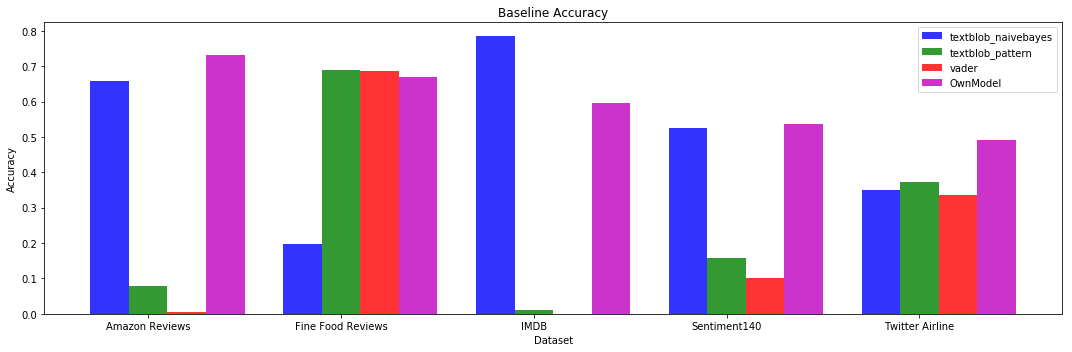

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("baseline_results.csv")
classifiers = list(df["classifier"])
df.drop(['overall'], axis=1, inplace=True)
headers = list(df)[:-1]
data = df.loc[:, df.columns != 'classifier']

colours = ['b', 'g', 'r', 'm']
 
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
index = np.arange(len(headers))
bar_width = 0.2
opacity = 0.8
 
for idx, (classifier, (_, results))  in enumerate(zip(classifiers, data.iterrows())):
    plt.bar(
        index + bar_width * idx,
        results,
        bar_width,
        alpha=opacity,
        color=colours[idx],
        label=classifier
    )
 
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Baseline Accuracy')
plt.xticks(index + bar_width, headers)
plt.legend()
 
plt.tight_layout()
plt.show()

From the results above its clear the classifiers with the most competitive results are textblob-naivebayes, achieving an overall accuracy of 50% on all test datasets and my own model which had an overall accuracy of 60%. These are great starting points for me to validate the performance of my future models. 

As for the textblob-pattern and vader classifiers, I am really surprised at their results on some of the datasets. As I stated above a purely _random_ baseline would be expected to achieve results of 33% on each dataset. However, on 3/5 of these datasets they had an accuracy below a random baseline. I dont know why this is the case. If I was to take a guess as to why this happened it would be that the inputs from those datasets are too large for these classifiers to handle and they are designed for smaller sequences of text.

### BERT

Last year, on the 11th of October, Google released [this](https://arxiv.org/abs/1810.04805) paper.

> We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT representations can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

On top of releasing the paper, they also made the weights and source code available for two variations of the model they trained, BERT-base and BERT-large. The difference between these two models is the size.  BERT-base has a total of 110M trainable parameters and BERT-large has a whopping 340M (at the time of the papers release this was the largest recorded NLP deep net). The weights made available are only for the [encoder](https://www.quora.com/What-is-an-Encoder-Decoder-in-Deep-Learning) layer of the BERT architecture, as these models were trained to inevitably have their decoder layer removed and then have a new head attached to [fine tune](https://medium.com/fintechexplained/how-to-fine-tune-your-machine-learning-models-to-improve-forecasting-accuracy-e18e67e58898) them on a downstream task.

>*This is a [PyTorch](https://pytorch.org/) layer summary of BERT-base's encoder with an output embedding size of 768*

    BERTEncoder(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(28996, 768)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): FusedLayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (12): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.1)
                )
                (output): BertSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (LayerNorm): FusedLayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
                  (dropout): Dropout(p=0.1)
                )
              )
              (intermediate): BertIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
              )
              (output): BertOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (LayerNorm): FusedLayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
                (dropout): Dropout(p=0.1)
              )
            )
          )
        )
        (pooler): BertPooler(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (activation): Tanh()
        )
      )
   
---

### bert-as-service

I initially planned on instantiating a pre-trained BERT model by studying the [source code](https://github.com/google-research/bert) and implementing the code. However, David put me onto [bert-as-service](https://github.com/hanxiao/bert-as-service), which made it almost effortless to get the model up and running. Below I describe the simple process of using bert-as-service. This process assumes you already have already installed [python](https://www.python.org/) and [tensorflow](https://www.tensorflow.org/) and downloaded the weights for one of the BERT models.

**Step 1 open a command line and enter the following commands to install bert-as-service using pythons package manager pip**

    pip install bert-serving-server
    pip install bert-serving-client

bert-serving-server is where all the magic happens. Users can connect to this server using the bert-serving-client module and send pieces of text to the server. These pieces of text will be preprocessed and fed through the BERT model and a n-dimensional vector will be returned for each piece of text. This vector is from the final output layer of the BERT model and is refferred to as a sentence embedding.

**Step 2 start the bert-serving-server.**

![](images/bert-as-service1.png)

- *bert-serving-server* is the command that needs to be run.

- *model_dir* is the path to the bert model on disk.

- (optional) *num_workers* is useful to process datasets faster as the processing of each piece of text is a single job and can be done in parrallel.

![](images/bert-as-service2.png)
                        
After the running the command above, if all goes well, your prompt should contain the same text in the red box above. This means that the server has successfully setup and is now ready to recieve requests from clients.

**Step 3 is to communicate with the server as a client.**


1|2
:-------------------------:|:-------------------------:
![](images/bert-as-service3.png) |  ![](images/bert-as-service4.png)

The left image is an example script a client would use to send text to the server. There is no limit on the amount of pieces of text that can be sent to the server at any time (will just take longer to process).

The right image is an example a 1024 dimensional embedding, of the sentence "This is a test!", returned by the server.

### Cosine Similarity

I took the custom training and test sets I created, encoded each sample into 768 and 1024 dimensional embeddings using bert-as-service and then saved them to two new training and test set pairs, one for 768 and the other for 1024 embedding sizes. 

I trained a few randomly chosen models, on the training set, to get a vague idea of the performance of the bert embeddings and was seeing around 60% accuracy on the validation set. It was at this point that David suggested that I compare some of the embeddings generated from bert-as-service using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity), as a sanity check, to validate the usefulness of the embeddings. I discovered that embeddings of sentences that are not related were still returning high positive values close to 1 from this check. This obviously set off alarms as one would expect numbers closer to or less than 0 for unrelated sentences. I couldn't explain why this was the case until I put in tested sentences with varying lengths. The results of this test were numbers closer to zero, regardless if the sentences were related or not. This is when I discovered that the bert-as-service server has a parameter for sentence length that defaults to 15 words. Therefore, when encoding sentences greater than 15 words, words after the first 15 are discarded and not included in the generation of the sentence embeddings.

With the knowledge in hand, I proceeded to then delete the ecnoded datasets I had generated, as they had many samples with lengths greater than 15 words. I then changed the word count parameter to 150 words in the server and re-encoded the datasets the same way as above.

### Grid Search

With my newly created datasets finished and a few test models, to make sure everything was working properly, I then moved on to creating a grid search to find a high performance model.

From [this](https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998) article a grid search is described as:
> the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

This technique usually requires alot of time/resources as a large amount of different models are trained and evaluated. Generally this wouldn't be possible to someone like myself to run because of the limited amount resources that are available. However, with the BERT embeddings that I know had, only a small feed foward network needs to be trained on these to achieve good results. Feed forward networks are incredibly parallelizable, which means training times, especially on a GPU, are quick. It is because of this I decided to create 7 dimensional grid search. The 7 dimensional part referring to the number of hyper parameters that I would be searching for the optimal setting.

These 7 hyper parameters I chose were:
   - Embedding Size - 768 or 1024 - The different sizes of the embedding, from the two different BERT models, return by bert-as-service
   
   
   - validation_splits = [0.1, 0.2] - Validation split is described [here](https://radiopaedia.org/articles/validation-split-machine-learning). I chose to test two different validation set sizes to see if the model would be able to reach similar results with less training data.
   
   
   - batch_sizes = [64, 128, 256] - Mini batchs are described [here](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/). I tested multiple different batch sizes to find whether allowing the the model to converge quickly or slowly was optimal.
   
   
   - optimizers = ["sgd", "rmsprop", "adam"] - Optimizers are described [here](https://blog.algorithmia.com/introduction-to-optimizers/). The optimizers I chose are all commonly used on various machine learning tasks and I wanted to see which one fit my model the best.
   
   
   - dropout_rates = [0.1, 0.2, 0.3, 0.4] - Dropout is described [here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5). The use of dropout as a regularization tool in machine has become increasingly more popular and is present in most machine learning models these days. Its no surprise then, that I chose to use it in my model. The values I chose are basically just the stand values.
   
   
   - activations = ["relu", "tanh", "sigmoid"] - Activation functions are described [here](https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/). Same as with the optimizers, these are some of the most commonly used activation functions used in machine learning models. The right activation function for each layer can be very impactful on a models results, so this hyper parameter, in my opinion, is one of, if not the, most important to find the optimal value in.
    
   
   - dense_layers = [1,2,3] => [32, 64, 128, 256] - The final two parameters are related so I included then together here. The first parameter here is the **number of dense layers**. A dense layer is just a fully connected layer in the model. Because the original BERT paper stated that only a small head was needed on top of the encoder I chose a maximum of 3 layers that would be part of a model. The second parameter is the **number of units** that a dense layer has. Each dense layer can have a different value for its number of units and I wanted to find the optimal number of dense layers and the optimal number of units for each of those layers.

Together, all of these hyper parameters, resulted in *36288* unique model combinations which made up my grid search.

### Results

The grid search took 6 days to complete. Throughout this time I encountered many bugs, that stopped it running. These bugs included a memory leak, certain models being skipped because of poorly formatted naming strings and just general feedback information being incorrect. Instead of starting the grid search from scratch every time and having to retrain alot of the models that had been trained, I implemented a feature that allowed training to be resumed from the last trained model. At the conclusion of the grid search I had some code that took all the results of the trained models so far and compiled them into a single csv. Because of the starting and stopping I had to create a script that took the results from all the models that had been trained at a time previous to the last run and combine them into the csv file.

I then created another scrip that went throught each model and combined the score that it achieved on each test set and returned the name of the model with the best overall score.

The naming string of the model was: **E-1024 VS-0.1 BS-128 OPT-adam DO-0.1 ACT-tanh D-256D-256D-128**

Alot to unpack from this string:

- E-1024: This is the size of bert embedding that performed the best. Not really surprising as the model with 1024 dimensional embeddings has much more weights than the 784 dimensional model and has therefore has the capacity to capture much more from its training.


- **VS-0.1**: The validation split size. I believe that this the case because the model had more training data to learn from. The dataset I used only had around 50,000 samples all up, which is rather small. If I had have used a larger training set, say 150,000-200,000, I would expect that this number would have been the other option 0.2.


- **BS-128**: The mini batch size. I thought that 64 would be the optimal value here as the models are very small so fast convergence seemed like the idea best fit.


- **OPT-adam**: This isn't really that surprising. Adam has proven to do very well on text classification tasks in the past, so it doing very well here just helps validate that for me. In the future I dont think I will keep this as a parameter in my grid searchs, but make it the default optimizer I use.


- **D0-0.1**: The dropout rate. Because the size of the models were very small, I think that dropout really wasnt that effective. Regrettably, I didnt add a no dropout parameter. This would be an interesting test in the future to see if dropout was in fact needed at all.


- **ACT-tanh**: The activation function. Very surprising as the tanh activation function is mainly used in binary classifcation problems. My guess is that is because it maps its inputs to values between -1 and 1 that it works well with the three labels that are in the range -1 and 1.


- **D-256D-256D-128**: The number of dense layers and their respective units. Three layers were optimal. For future tests I could add some more layers and allow more units in each layer to see if my grid search did not allow enough space.


The models test results were as follows:

- On the **Amazon Reviews** dataset it achieved 86.32% accuracy. This was a 9% increase over that the score that the best baseline model achieved, on this dataset, which was 77.86%.
 
 
- On the **Fine Food Reviews** dataset it achieved 81.32% accuracy. This was a 12% increase over that the score that the best baseline model achieved, on this dataset, which was 69.05%.
 
 
- On the **IMDB** dataset it achieved 84.52% accuracy. This was a 6% increase over that the score that the best baseline model achieved, on this dataset, which was 78.46%.
 
 
- On the **Sentiment140** dataset it achieved 76.26% accuracy. This was a 23% increase over that the score that the best baseline model achieved, on this dataset, which was 53.73%.
 
 
- On the **Twitter Airline** dataset it achieved 78.10% accuracy. This was a 29% increase over that the score that the best baseline model achieved, on this dataset, which was 49.05%.
 
 
The model achieved an overall score of 81.30% on all test sets combined. This was a 21% increase over the best baseline on all test sets combined, which was 60.53%.


Im not going to lie, when I saw these results I was pretty gobsmacked. I didnt expect to even achieve, let alone exceed, the 80% accuracy that David set for me after my experiences with how difficult it was last semester.

All model results can be found within the project repo at "bert-modeling/bert-as-service/all results.csv".

### Wrapping up

In conclusion, im very happy with the way this semester turned out. At first I was rather hesitant at continuing on with my sentiment analysis engine project. I had such lackluster results last semester and also did not really feel as though there was a that much more interesting stuff that I had to learn when it came to sentiment analysis. I really would have regretted that now as I was finally able to overcome the goal that was set for me last semester, which felt like a life time ago. I learnt alot more than I expected to as well. From learning the correct proceedures to follow when combining multiple dataset, making a GUI using Tkinter, learning to use bert-as-service and finally making a much more complex grid search, I feel this semester,though long and at some point very stagnant, was a great success.

So whats next for this project? Well after seeing the results I was achieving, David said he wishes to use my model to aid in his own research. So, I had to create an API for him to interact with my model. I also plan to creat a web application around the model, so I can show it off to friends and family. It will also be a very good asset to show off to future employers.

---
# Technical and Professional Development

On top of my project, I was required to complete at least 3 pieces of technical/professional and voluntary work. At least 1 being technical/professional and 1 being voluntary.

## Development

1. *07/05/19 - Code Craft monthly meetup - Otago Polytech, D-BLOCK* - Two part talk on [Git Workflow](https://slides.com/thumper/git-workflow#/) and [History of Distributed Version Control Software](https://slides.com/thumper/dvcs-history#/) by Tim Penhey, software developer of 25 years, currently working at [canonical](https://www.canonical.com/).

    - The first part of Tim's talk, which was about the history of version control software, I found really interesting and informative. The only version control software I have ever used, or even heard of, is git. Honestly I have never even questioned if there was alternatives out there, git just seems to be the thing. I learnt all the way from the earliest VCS's that only one person could use and also about the two contenders
    
    - The second part of the talk was about how Tim uses git in his daily workflow. He introduces

## Voluntary Work

Mosgiel Library Drop-in centre